Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_file = '/content/drive/shared-with-me/Orca Training Photos'

In [ ]:
val_data = '/content/drive/shared-with-me/Orcas Validation Photos'

Installing and Importing Libraries

In [ ]:
!pip install keras

In [ ]:
#Importing libraries
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Image Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Already defined these variables
image_width, image_height = 150, 150
batch_size = 32
train_data_directory = '/content/drive/My Drive/Orca Training Photos'
val_data_directory = '/content/drive/My Drive/Orcas Validation Photos'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'  # Use of 'categorical' for multi-class classification
)

validation_generator = val_datagen.flow_from_directory(
    val_data_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'  # Use of 'categorical' for multi-class classification
)


Found 1009 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


Model Building and Compilation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Third convolutional block with increased filters
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Fourth convolutional block with increased filters
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Flatten the results to feed into dense layers
    Flatten(),

    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dropout(0.5),

    # Output layer with single neuron for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,811,969 (25.99 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

Model Training, Validation and Evaluation

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assuming you have set your batch_size earlier
batch_size = 32  # or the batch size you have chosen

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=0.01
)

# Now you can use these in your model.fit call
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr]
)

# Repeat steps for epochs=50, 100, 150, 200, 250, and 300
# Adjust learning rate to optimize result

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 297s 9s/step - accuracy: 0.4418 - loss: 0.8072 - val_accuracy: 0.6042 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 2/30
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2:46 6s/step - accuracy: 0.4706 - loss: 0.6951

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.4706 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 622ms/step - accuracy: 0.4860 - loss: 0.6933 - val_accuracy: 0.4792 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.4688 - loss: 0.6909 - val_accuracy: 0.5104 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 678ms/step - accuracy: 0.4742 - loss: 0.6938 - val_accuracy: 0.5312 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6562 - loss: 0.6901 - val_accuracy: 0.5208 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 672ms/step - accuracy: 0.5340 - loss: 0.6925 - val_accuracy: 0.4479 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4375 - loss: 0.7010 - val_accuracy

Model Accuracy and Loss Plots

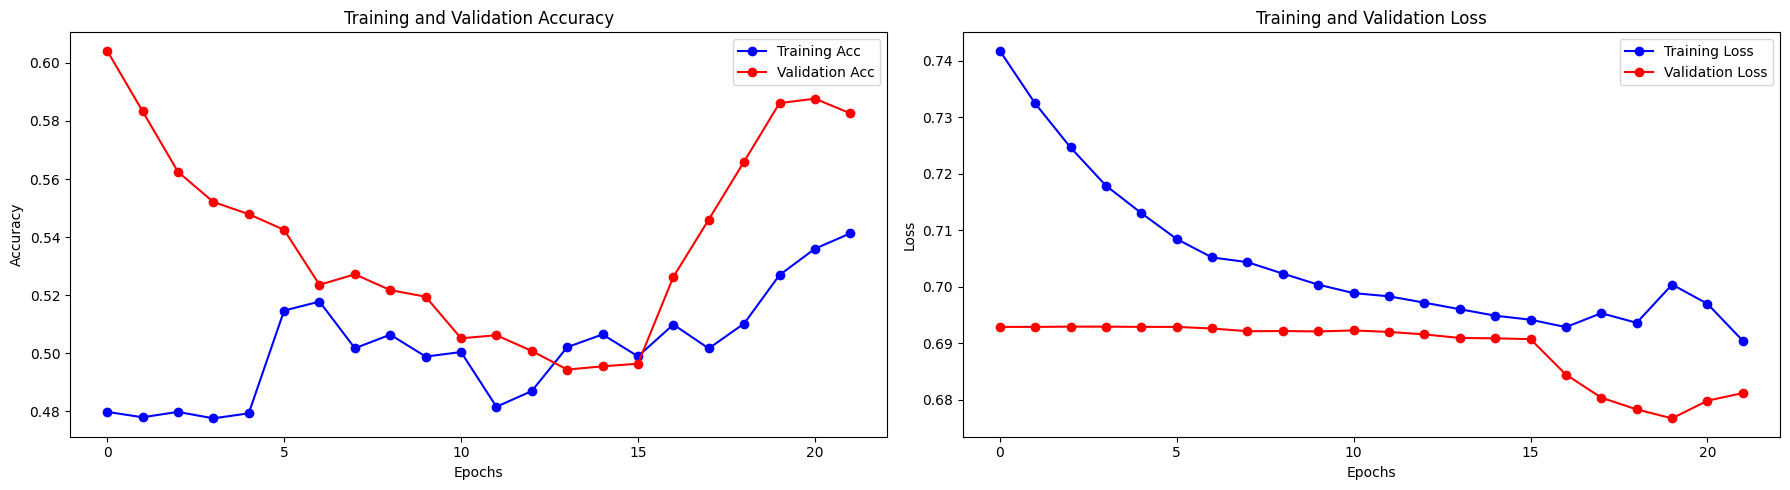

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Plotting both the training and validation accuracy and loss
plt.figure(figsize=(18, 5))  # Define a larger figure size

# Subplot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(smooth_curve(history.history['accuracy']), 'bo-', label='Training Acc')
plt.plot(smooth_curve(history.history['val_accuracy']), 'ro-', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(smooth_curve(history.history['loss']), 'bo-', label='Training Loss')
plt.plot(smooth_curve(history.history['val_loss']), 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

Improving Model with VGG16 Pretrained Model and Hyperparameter Tuning

In [ ]:
# Improving the model with pretrained VGG16 Model

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the VGG16 network, ensuring the input shape matches your image size
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(150, 150, 3)))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summarize the model
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_lr=0.00001)

# Train the model
# Define the class weights
# 0 corresponds to female, 1 corresponds to male
class_weight = {0: 1.0, 1: 1.5}  # Adjust the weight for the male class

# Train the model with class weights
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight  # Add class_weight here
)


# After training, evaluate the model's performance on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation loss: {val_loss}, Validation accuracy: {val_accuracy}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 849ms/step - accuracy: 0.5460 - loss: 1.6661 - val_accuracy: 0.7292 - val_loss: 0.4827 - learning_rate: 0.0010
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6250 - loss: 0.7005 - val_accuracy: 0.7083 - val_loss: 0.5188 - learning_rate: 0.0010
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7744 - loss: 0.5679 - val_accuracy: 0.8750 - val_loss: 0.3510 - learning_rate: 0.0010
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8438 - loss: 0.3746 - val_accuracy: 0.8854 - val_loss: 0.3469 - learning_rate: 0.0010
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 590ms/step - accuracy: 0.8550 - loss: 0.4584 - val_accuracy: 0.7292 - val_loss: 0.4781 - learning_rate: 0.0010
Epoch 6/30
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.7188 - loss: 0.6525
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7188 - loss: 0.6525 - val_accuracy: 0

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model # Use Model instead of Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the VGG16 network, ensuring the input shape matches your image size
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(150, 150, 3)))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
# Use the Model API for functional models
inputs = Input(shape=(150, 150, 3))
x = base_model(inputs)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile and train as before
# Compilation of the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summarize the model
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_lr=0.00001)

# Train the model
# Define the class weights
# 0 corresponds to female, 1 corresponds to male
class_weight = {0: 1.0, 1: 1.5}  # Adjust the weight for the male class

# Train the model with class weights
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight  # Add class_weight here
)


# After training, evaluate the model's performance on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation loss: {val_loss}, Validation accuracy: {val_accuracy}")

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_40']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 669ms/step - accuracy: 0.5351 - loss: 1.5868 - val_accuracy: 0.6146 - val_loss: 0.5947 - learning_rate: 0.0010
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8125 - loss: 0.6402 - val_accuracy: 0.5625 - val_loss: 0.6404 - learning_rate: 0.0010
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 601ms/step - accuracy: 0.6850 - loss: 0.6551 - val_accuracy: 0.8229 - val_loss: 0.4262 - learning_rate: 0.0010
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8125 - loss: 0.4768 - val_accuracy: 0.8333 - val_loss: 0.4330 - learning_rate: 0.0010
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7775 - loss: 0.5490 - val_accuracy: 0.8542 - val_loss: 0.3766 - learning_rate: 0.0010
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8750 - loss: 0.3311 - val_accuracy: 0.8542 - val_loss: 0.3763 - learning_rate: 0.0010
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8216 - loss: 0.5032 - val_accuracy: 0.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Load the VGG16 network, ensuring the input shape matches your image size
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(150, 150, 3)))

# Freeze the first 15 layers (for example)
for layer in base_model.layers[:15]:
    layer.trainable = False

# Unfreeze the remaining layers
for layer in base_model.layers[15:]:
    layer.trainable = True

# Create a new model on top
inputs = Input(shape=(150, 150, 3))
x = base_model(inputs)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.00001),  # Use a smaller learning rate for fine-tuning
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summarize the model
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_lr=0.00001)

# Define the class weights
class_weight = {0: 1.0, 1: 1.5}  # Adjust the weight for the male class

# Train the model with class weights
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight
)

# After training, evaluate the model's performance on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation loss: {val_loss}, Validation accuracy: {val_accuracy}")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_65']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


31/31 ━━━━━━━━━━━━━━━━━━━━ 28s 689ms/step - accuracy: 0.5542 - loss: 0.8733 - val_accuracy: 0.5208 - val_loss: 0.6354 - learning_rate: 1.0000e-05
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6875 - loss: 0.7211 - val_accuracy: 0.5625 - val_loss: 0.5989 - learning_rate: 1.0000e-05
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 34s 622ms/step - accuracy: 0.6561 - loss: 0.7431 - val_accuracy: 0.6771 - val_loss: 0.5245 - learning_rate: 1.0000e-05
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7500 - loss: 0.6879 - val_accuracy: 0.6771 - val_loss: 0.5265 - learning_rate: 1.0000e-05
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 667ms/step - accuracy: 0.7196 - loss: 0.6405 - val_accuracy: 0.8542 - val_loss: 0.4170 - learning_rate: 1.0000e-05
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6250 - loss: 0.7754 - val_accuracy: 0.8438 - val_loss: 0.4077 - learning_rate: 1.0000e-05
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 644ms/step - accuracy: 0.8204 - l

Testing Model on Test Dataset

In [ ]:
import os

# Define the correct directory path for your test photos
test_data_directory = '/content/drive/My Drive/Orca Test Photos'  # Change to the actual path in your Google Drive

# Check if the directory exists
if os.path.exists(test_data_directory):
    print("Test photo folder found!")
else:
    print("Test photo folder not found. Please check the path.")

# Prepare the test data generator (assuming the test images are unlabelled in the test folder)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# No data augmentation for test data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(150, 150),  # Change to the input size of your model
    batch_size=32,
    class_mode=None,  # No class mode since the data is unlabeled
    shuffle=False  # Keep the data in the same order for consistent predictions
)

# Generate predictions on the test data
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

# Convert predictions to binary classes (e.g., 0 = female, 1 = male)
predicted_classes = (predictions > 0.5).astype(int)

# Map predicted classes to labels (assuming 0 = female, 1 = male)
class_labels = {0: 'female', 1: 'male'}

# Get filenames from the test generator
filenames = test_generator.filenames

# Combine filenames with predictions
import pandas as pd

results_df = pd.DataFrame({
    'Filename': filenames,
    'Predicted Label': [class_labels[cls] for cls in predicted_classes.flatten()]
})

# Display or save the results
print(results_df)

results_df.to_csv('/content/drive/MyDrive/orca_test_predictions (version 1).xlsb.csv', index=False)


Test photo folder found!
Found 112 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_65']
Received: inputs=Tensor(shape=(32, 150, 150, 3))
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
                    Filename Predicted Label
0     All Images/pic_111.jpg            male
1     All Images/pic_112.jpg            male
2    All Images/pic_1184.jpg          female
3    All Images/pic_1185.jpg          female
4    All Images/pic_1186.jpg          female
..                       ...             ...
107   All Images/pic_659.jpg          female
108     All Images/pic_7.jpg          female
109    All Images/pic_70.jpg          female
110     All Images/pic_8.jpg          female
111    All Images/pic_84.jpg          female

[112 rows x 2 columns]


Calculating Statistical Parameters

In [ ]:
import numpy as np

# Convert the predicted labels to binary (0 for female, 1 for male)
binary_labels = np.array([1 if label == 'male' else 0 for label in results_df['Predicted Label']])

# Calculate the average (mean), standard deviation (std), and variance (var)
mean = np.mean(binary_labels)
std_dev = np.std(binary_labels)
variance = np.var(binary_labels)

print(f"Average (mean): {mean}")
print(f"Standard Deviation (std): {std_dev}")
print(f"Variance (var): {variance}")


Average (mean): 0.19642857142857142
Standard Deviation (std): 0.397296347522982
Variance (var): 0.15784438775510207


Comparing Prediction with Ground truth of Test Data

In [ ]:
import numpy as np

# Manually create y_true based on the labels you provided
y_true = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                   0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                   1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
                   0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                   0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])


Adjusting Model Evaluation using Preccision, Recall and F1-score

In [ ]:
from sklearn.metrics import classification_report

# Assuming 'predicted_classes' contains the model's binary predictions (0 for female, 1 for male)
# For example, you can get this from your model's predictions on the test data
predicted_classes = (predictions > 0.5).astype(int)  # Convert predictions to binary

# Generate the classification report
print(classification_report(y_true, predicted_classes, target_names=['female', 'male']))


              precision    recall  f1-score   support

      female       0.81      0.89      0.85        82
        male       0.59      0.43      0.50        30

    accuracy                           0.77       112
   macro avg       0.70      0.66      0.67       112
weighted avg       0.75      0.77      0.76       112



Confusion Matrix

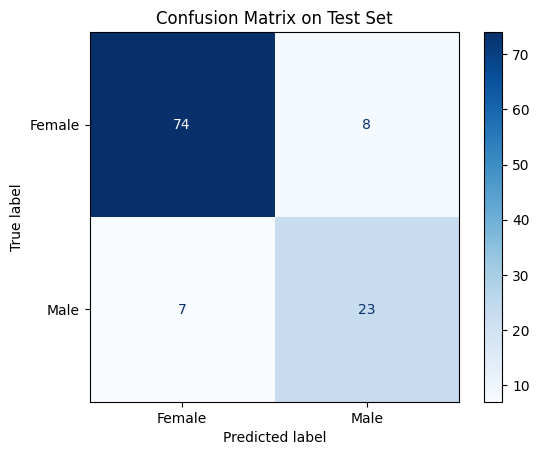

              precision    recall  f1-score   support

      Female       0.91      0.90      0.91        82
        Male       0.74      0.77      0.75        30

    accuracy                           0.87       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.87      0.87      0.87       112



In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Load your labeled test results
df = pd.read_csv('/content/drive/MyDrive/CSVs/orca_test_predictions (version 1).csv')

# Map labels to binary format: 0 = Female, 1 = Male
label_map = {'female': 0, 'male': 1}
y_true = df['True Label'].map(label_map)
y_pred = df['Predicted Label'].map(label_map)

# Generate and display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Female', 'Male'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix on Test Set')
plt.savefig('/content/drive/My Drive/confusion_matrix_test.png', bbox_inches='tight')  # Saves the figure
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Female', 'Male']))